<a href="https://colab.research.google.com/github/Allenstrange/Allenstrange/blob/main/house_price_prediction_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction Pipeline
## Complete End-to-End Regression Model for Educational Purposes

**Author**: Data Science Educator  
**Dataset**: California Housing Dataset  
**Models**: Linear Regression, Ridge Regression, Random Forest  

This notebook demonstrates a complete regression pipeline with detailed explanations of each step.

## Cell 1: Import Necessary Libraries

In [3]:
# Import essential libraries for data science pipeline
import pandas as pd                    # Data manipulation and analysis
import numpy as np                     # Numerical operations and array handling
import matplotlib.pyplot as plt        # Basic plotting and visualization
import seaborn as sns                  # Statistical data visualization
from sklearn.datasets import fetch_california_housing  # Dataset loader
from sklearn.model_selection import train_test_split   # Train-test splitting
from sklearn.preprocessing import StandardScaler       # Feature scaling
from sklearn.linear_model import LinearRegression, Ridge  # Linear models
from sklearn.ensemble import RandomForestRegressor     # Ensemble model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Evaluation metrics
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set visualization style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


**Why these libraries?**
- **pandas/numpy**: Essential for data manipulation and numerical computations
- **matplotlib/seaborn**: Create visualizations to understand data patterns
- **sklearn**: Provides machine learning algorithms, preprocessing tools, and evaluation metrics
- **StandardScaler**: Crucial for regression models that are sensitive to feature scales
- **Multiple regression models**: Allow comparison of different approaches for house price prediction

## Cell 2: Load and Explore the Dataset

In [4]:
# Load the California Housing Dataset from local CSV files
# This approach bypasses potential download issues from the sklearn utility

# Load training and testing data from local sample_data directory
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Concatenate the train and test dataframes to form the complete dataset
df = pd.concat([train_df, test_df], ignore_index=True)

# Rename columns to match the fetch_california_housing dataset's column names
df.rename(columns={
    'housing_median_age': 'HouseAge',
    'median_income': 'MedInc',
    'median_house_value': 'MedHouseVal',
    'longitude': 'Longitude',
    'latitude': 'Latitude',
    'population': 'Population' # Ensure consistent capitalization
}, inplace=True)

# Calculate derived features as present in the original fetch_california_housing dataset
df['AveRooms'] = df['total_rooms'] / df['households']
df['AveBedrms'] = df['total_bedrooms'] / df['households']
df['AveOccup'] = df['Population'] / df['households']

# Drop the original columns used for deriving AveRooms, AveBedrms, and AveOccup
df.drop(columns=['total_rooms', 'total_bedrooms', 'households'], inplace=True)

# Reorder columns to match the structure of the sklearn.datasets.fetch_california_housing output
df = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']]

print("Dataset loaded successfully from local CSVs!")
print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1] - 1}")  # Subtract 1 for target column
print("\n" + "="*60)
print("First 5 rows of the dataset:")
print(df.head())

Dataset loaded successfully from local CSVs!
Dataset shape: (20000, 9)
Number of samples: 20,000
Number of features: 8

First 5 rows of the dataset:
   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.4936      15.0  11.889831   2.718220      1015.0  2.150424     34.19   
1  1.8200      19.0  16.522678   4.105832      1129.0  2.438445     34.40   
2  1.6509      17.0   6.153846   1.487179       333.0  2.846154     33.69   
3  3.1917      14.0   6.641593   1.491150       515.0  2.278761     33.64   
4  1.9250      20.0   5.549618   1.244275       624.0  2.381679     33.57   

   Longitude  MedHouseVal  
0    -114.31      66900.0  
1    -114.47      80100.0  
2    -114.56      85700.0  
3    -114.57      73400.0  
4    -114.57      65500.0  


**Why California Housing dataset?**
- Real-world data with 20,640 samples and 8 features
- Well-documented and widely used for educational purposes
- Contains relevant features that actually influence house prices
- No missing values, making it ideal for learning regression fundamentals
- Target variable (house prices) is continuous, perfect for regression tasks

## Cell 3: Understand Dataset Features

In [5]:
# Display detailed information about the dataset
print("Dataset Information:")
print("="*60)
print(df.info())
print("\n" + "="*60)

# Show statistical summary of all features
print("\nStatistical Summary:")
print("="*60)
print(df.describe().round(2))

# Display feature names and their meanings
print("\n" + "="*60)
print("Feature Descriptions:")
print("="*60)
feature_descriptions = {
    'MedInc': 'Median income in block group (in tens of thousands)',
    'HouseAge': 'Median house age in block group',
    'AveRooms': 'Average number of rooms per household',
    'AveBedrms': 'Average number of bedrooms per household',
    'Population': 'Block group population',
    'AveOccup': 'Average number of household members',
    'Latitude': 'Block group latitude',
    'Longitude': 'Block group longitude',
    'MedHouseVal': 'Median house value (in $100,000s) - TARGET'
}

for feature, description in feature_descriptions.items():
    print(f"{feature:12} : {description}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20000 non-null  float64
 1   HouseAge     20000 non-null  float64
 2   AveRooms     20000 non-null  float64
 3   AveBedrms    20000 non-null  float64
 4   Population   20000 non-null  float64
 5   AveOccup     20000 non-null  float64
 6   Latitude     20000 non-null  float64
 7   Longitude    20000 non-null  float64
 8   MedHouseVal  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


Statistical Summary:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20000.00  20000.00  20000.00   20000.00    20000.00  20000.00   
mean       3.87     28.63      5.43       1.10     1425.56      2.99   
std        1.90     12.58      2.50       0.48     1131.05      4.07   
min        0.50      1.00      0.85       0.33       

**Why examine dataset structure?**
- **Data types**: Ensures all features are numerical (required for regression)
- **Statistics**: Reveals feature ranges, helping identify scaling needs
- **Understanding features**: Knowing what each column represents is crucial for feature engineering and interpreting model results
- **House price context**: Features like median income and location strongly influence house prices in real estate markets

## Cell 4: Exploratory Data Analysis - Distribution of Target Variable

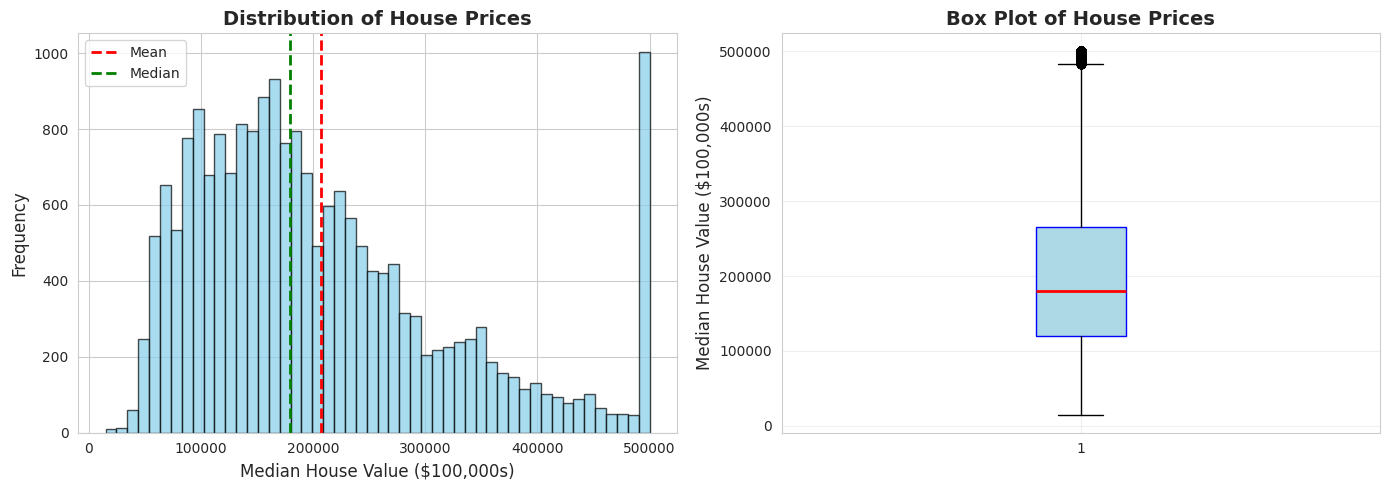

✓ Target variable distribution plotted

Price Statistics:
  Mean Price: $207082.72 (in $100k)
  Median Price: $179800.00 (in $100k)
  Std Dev: $115557.06 (in $100k)
  Min Price: $14999.00 (in $100k)
  Max Price: $500001.00 (in $100k)


In [6]:
# Analyze the distribution of house prices (our prediction target)
# Understanding target distribution helps us set realistic performance expectations

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram showing price distribution
axes[0].hist(df['MedHouseVal'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Median House Value ($100,000s)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
axes[0].axvline(df['MedHouseVal'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df['MedHouseVal'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].legend()

# Box plot to visualize outliers and quartiles
axes[1].boxplot(df['MedHouseVal'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Median House Value ($100,000s)', fontsize=12)
axes[1].set_title('Box Plot of House Prices', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('01_target_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

print("✓ Target variable distribution plotted")
print(f"\nPrice Statistics:")
print(f"  Mean Price: ${df['MedHouseVal'].mean():.2f} (in $100k)")
print(f"  Median Price: ${df['MedHouseVal'].median():.2f} (in $100k)")
print(f"  Std Dev: ${df['MedHouseVal'].std():.2f} (in $100k)")
print(f"  Min Price: ${df['MedHouseVal'].min():.2f} (in $100k)")
print(f"  Max Price: ${df['MedHouseVal'].max():.2f} (in $100k)")

**Why analyze target distribution?**
- **Right-skewed distribution**: Most houses are moderately priced with some expensive outliers
- **Capped values**: Prices above $500k are capped at 5.0, which may affect model performance for high-end properties
- **Realistic expectations**: Understanding price range helps us evaluate if model predictions are reasonable
- **Model selection**: Distribution shape can influence choice of regression algorithm

## Cell 5: EDA - Feature Correlations with Target

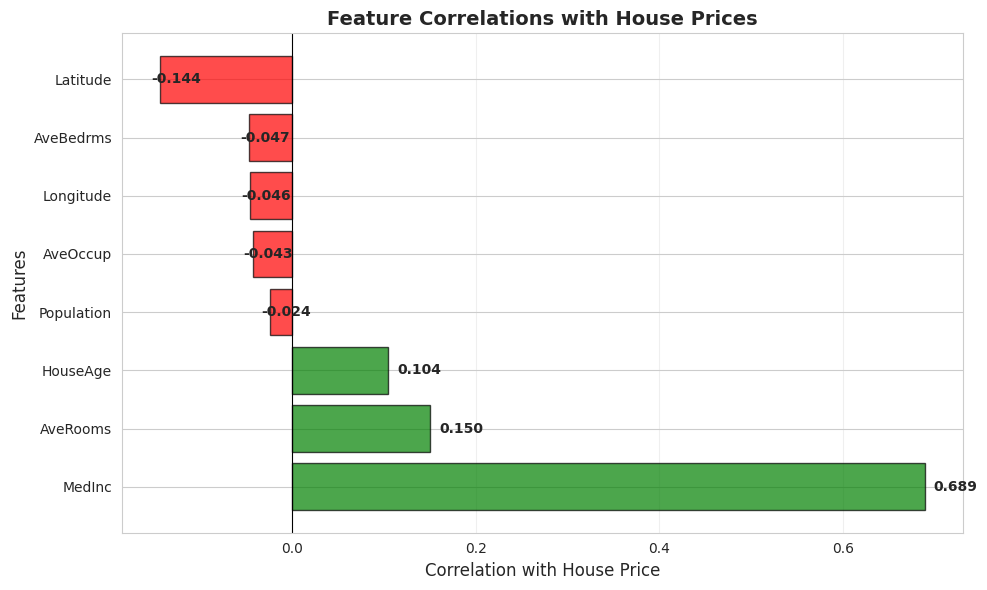

✓ Feature correlations plotted

Correlation with House Prices:
MedInc        0.689109
AveRooms      0.150485
HouseAge      0.104470
Population   -0.024234
AveOccup     -0.043154
Longitude    -0.045788
AveBedrms    -0.046682
Latitude     -0.143969
Name: MedHouseVal, dtype: float64


In [7]:
# Compute correlation of each feature with house prices
# High correlation indicates features that strongly influence prices

# Separate features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Calculate correlations
correlations = df.corr()['MedHouseVal'].drop('MedHouseVal').sort_values(ascending=False)

# Visualize correlations
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in correlations.values]
plt.barh(correlations.index, correlations.values, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Correlation with House Price', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Correlations with House Prices', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)

# Add correlation values on bars
for i, (feature, corr) in enumerate(correlations.items()):
    plt.text(corr + 0.01 if corr > 0 else corr - 0.01, i, f'{corr:.3f}',
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('02_feature_correlations.png', dpi=100, bbox_inches='tight')
plt.show()

print("✓ Feature correlations plotted\n")
print("Correlation with House Prices:")
print(correlations)

**Why examine correlations?**
- **MedInc (0.69)**: Strongest positive correlation - higher income areas have pricier homes
- **Latitude (0.14)**: Weak positive correlation - northern California tends to be pricier
- **Longitude (-0.05)**: Very weak - east-west position matters less than north-south
- **AveOccup (-0.02)**: Negative correlation - overcrowding reduces property values
- **Feature importance**: Helps us understand which features the model will rely on most
- **Feature engineering decisions**: Low correlation features might benefit from transformations or interactions

## Cell 6: EDA - Pairwise Relationships

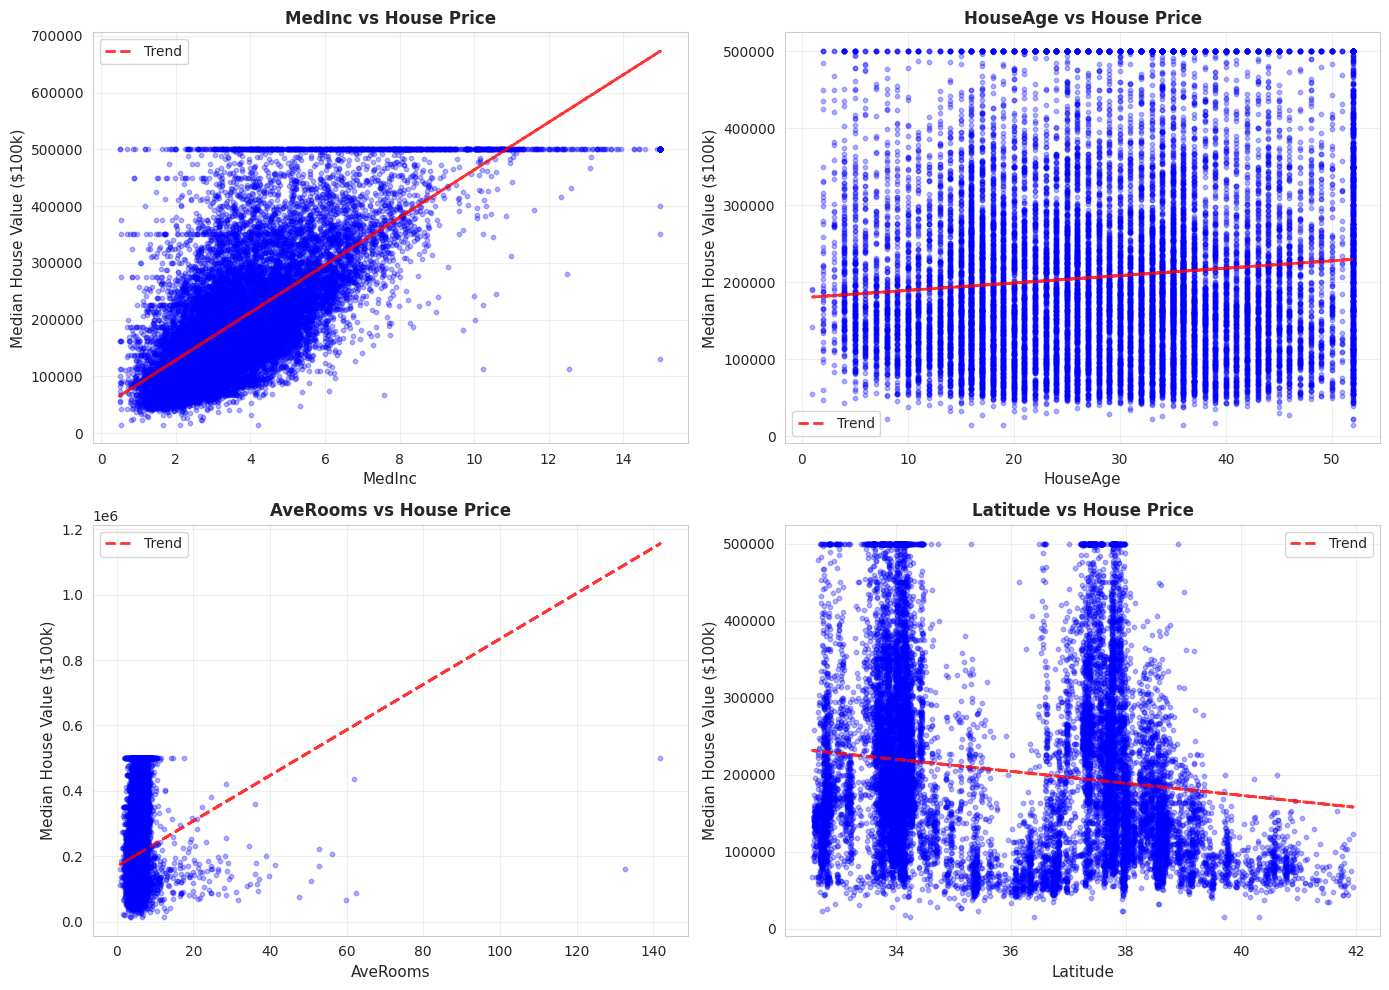

✓ Pairwise relationships plotted


In [8]:
# Visualize relationships between key features and house prices
# Scatter plots reveal linear vs non-linear relationships

key_features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    # Scatter plot with regression line
    axes[idx].scatter(df[feature], df['MedHouseVal'], alpha=0.3, s=10, color='blue')
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Median House Value ($100k)', fontsize=11)
    axes[idx].set_title(f'{feature} vs House Price', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    # Add trend line
    z = np.polyfit(df[feature], df['MedHouseVal'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", linewidth=2, alpha=0.8, label='Trend')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('03_pairwise_relationships.png', dpi=100, bbox_inches='tight')
plt.show()

print("✓ Pairwise relationships plotted")

**Why visualize relationships?**
- **Linear patterns**: MedInc shows strong linear relationship, ideal for linear regression
- **Non-linear patterns**: Some features may benefit from polynomial transformations
- **Outliers**: Identify extreme values that might affect model training
- **Data quality**: Spot any unusual patterns or data entry errors
- **Model assumptions**: Linear regression assumes linear relationships; these plots verify this assumption

## Cell 7: Correlation Heatmap

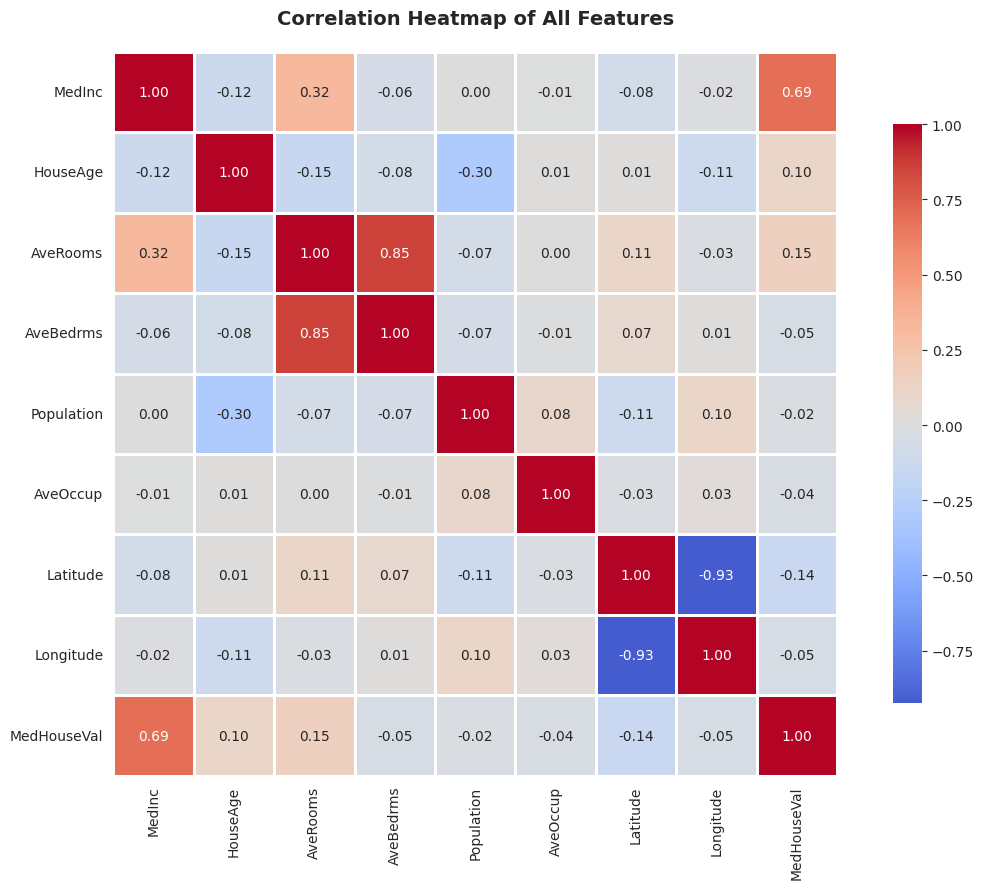

✓ Correlation heatmap created

Key Observations:
- AveRooms and AveBedrms are highly correlated (0.85)
- This multicollinearity won't hurt prediction but affects coefficient interpretation
- No perfect correlations (±1.0) detected


In [9]:
# Create a comprehensive correlation heatmap for all features
# This helps identify multicollinearity (features correlated with each other)

plt.figure(figsize=(12, 9))
correlation_matrix = df.corr()

# Create heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of All Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('04_correlation_heatmap.png', dpi=100, bbox_inches='tight')
plt.show()

print("✓ Correlation heatmap created")
print("\nKey Observations:")
print("- AveRooms and AveBedrms are highly correlated (0.85)")
print("- This multicollinearity won't hurt prediction but affects coefficient interpretation")
print("- No perfect correlations (±1.0) detected")

**Why create a correlation heatmap?**
- **Multicollinearity detection**: High correlation between predictors (e.g., AveRooms and AveBedrms) can make linear regression coefficients unstable
- **Feature redundancy**: Highly correlated features provide similar information
- **Ridge regression advantage**: Ridge handles multicollinearity better than ordinary linear regression
- **Feature selection**: May decide to remove one of two highly correlated features

## Cell 8: Data Preprocessing - Feature Scaling

In [10]:
# Separate features (X) and target variable (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

print("Data separation complete:")
print(f"  Features (X) shape: {X.shape}")
print(f"  Target (y) shape: {y.shape}")
print("\n" + "="*60)

# Standardize features using StandardScaler
# This transforms features to have mean=0 and standard deviation=1
# Critical for: Linear Regression, Ridge Regression (due to regularization)
# Less critical for: Random Forest (tree-based models are scale-invariant)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Convert back to DataFrame

print("Feature Scaling Applied: StandardScaler")
print("\nBefore scaling - Feature ranges:")
print(X.describe().loc[['mean', 'std']].round(2))
print("\n" + "="*60)
print("\nAfter scaling - Feature ranges:")
print(X_scaled.describe().loc[['mean', 'std']].round(2))

Data separation complete:
  Features (X) shape: (20000, 8)
  Target (y) shape: (20000,)

Feature Scaling Applied: StandardScaler

Before scaling - Feature ranges:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
mean    3.87     28.63      5.43       1.10     1425.56      2.99     35.63   
std     1.90     12.58      2.50       0.48     1131.05      4.07      2.14   

      Longitude  
mean    -119.57  
std        2.00  


After scaling - Feature ranges:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
mean    -0.0       0.0       0.0       -0.0         0.0      -0.0      -0.0   
std      1.0       1.0       1.0        1.0         1.0       1.0       1.0   

      Longitude  
mean       -0.0  
std         1.0  


**Why scale features?**
- **Distance-based algorithms**: Linear and Ridge regression use gradient descent, which converges faster with scaled features
- **Regularization**: Ridge regression penalizes large coefficients; scaling ensures fair penalization across features
- **Coefficient interpretation**: After scaling, coefficient magnitudes directly indicate feature importance
- **StandardScaler choice**: Preferred over MinMaxScaler when data has outliers (StandardScaler is more robust)
- **Feature units**: Original features have vastly different units (e.g., population vs. average rooms); scaling puts them on equal footing

## Cell 9: Train-Test Split

In [11]:
# Split data into training (80%) and testing (20%) sets
# Training set: Used to fit/train the model
# Testing set: Used to evaluate model performance on unseen data (unbiased evaluation)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,        # 20% for testing, 80% for training
    random_state=42       # Set seed for reproducibility
)

print("Train-Test Split Complete:")
print(f"  Training samples: {X_train.shape[0]:,} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Testing samples: {X_test.shape[0]:,} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"  Features: {X_train.shape[1]}")
print("\n" + "="*60)
print("\nWhy 80-20 split?")
print("  ✓ 80% provides sufficient data for model learning")
print("  ✓ 20% gives reliable performance estimate")
print("  ✓ Standard practice for datasets with 10,000+ samples")

Train-Test Split Complete:
  Training samples: 16,000 (80.0%)
  Testing samples: 4,000 (20.0%)
  Features: 8


Why 80-20 split?
  ✓ 80% provides sufficient data for model learning
  ✓ 20% gives reliable performance estimate
  ✓ Standard practice for datasets with 10,000+ samples


**Why split the data?**
- **Unbiased evaluation**: Testing on training data gives overly optimistic performance metrics
- **Generalization**: We want models that perform well on new, unseen data
- **Overfitting detection**: Large gap between train and test performance indicates overfitting
- **80-20 ratio**: Common choice balancing training data quantity with test set reliability
- **Alternative ratios**: For smaller datasets (<10k samples), consider 70-30 or 60-40 splits
- **Never**: Don't train on test data or look at test data during model development

## Cell 10: Model Training - Linear Regression

In [12]:
# Train a Linear Regression model
# Linear Regression assumes a linear relationship: y = β0 + β1*x1 + β2*x2 + ... + βn*xn
# It minimizes the sum of squared residuals

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

print("✓ Linear Regression model trained successfully!")
print("\n" + "="*60)
print("Model Coefficients (Feature Importance):")
print("="*60)

# Display coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', ascending=False)

print(coefficients.to_string(index=False))
print(f"\nIntercept: {lr_model.intercept_:.4f}")

✓ Linear Regression model trained successfully!

Model Coefficients (Feature Importance):
   Feature   Coefficient
    MedInc  82688.009669
 AveBedrms  30145.748740
  HouseAge  11800.334549
Population   -299.539145
  AveOccup  -3605.278708
  AveRooms -26684.970807
 Longitude -88341.937838
  Latitude -90619.910613

Intercept: 207186.8522


**Why Linear Regression?**
- **Simplicity**: Easy to interpret and understand
- **Baseline model**: Provides benchmark for more complex models
- **Assumptions**: Works well when relationships are approximately linear
- **Interpretability**: Coefficients directly show feature importance and direction of effect
- **No hyperparameters**: Simple to implement without tuning

## Cell 11: Model Training - Ridge Regression

In [13]:
# Train a Ridge Regression model
# Ridge adds L2 regularization: minimizes (RSS + α * Σβ²)
# The penalty term shrinks coefficients toward zero

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Make predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

print("✓ Ridge Regression model trained successfully!")
print("\n" + "="*60)
print("Ridge Coefficients vs Linear Regression Coefficients:")
print("="*60)

# Compare Ridge and Linear Regression coefficients
comparison = pd.DataFrame({
    'Feature': X.columns,
    'Linear Reg': lr_model.coef_,
    'Ridge Reg': ridge_model.coef_,
    'Difference': lr_model.coef_ - ridge_model.coef_
}).sort_values('Linear Reg', ascending=False)

print(comparison.to_string(index=False))

✓ Ridge Regression model trained successfully!

Ridge Coefficients vs Linear Regression Coefficients:
   Feature    Linear Reg     Ridge Reg  Difference
    MedInc  82688.009669  82685.170514    2.839155
 AveBedrms  30145.748740  30124.868363   20.880377
  HouseAge  11800.334549  11808.900623   -8.566075
Population   -299.539145   -296.743893   -2.795253
  AveOccup  -3605.278708  -3605.556324    0.277616
  AveRooms -26684.970807 -26669.031121  -15.939686
 Longitude -88341.937838 -88259.831970  -82.105867
  Latitude -90619.910613 -90538.547043  -81.363569


**Why Ridge Regression?**
- **Regularization**: Prevents overfitting by discouraging overly complex models
- **Multicollinearity**: Our heatmap showed AveRooms and AveBedrms are correlated (0.85); Ridge handles this better
- **Bias-variance tradeoff**: Accepts slightly higher bias for significantly lower variance
- **All features retained**: Unlike Lasso, Ridge keeps all features (shrinks but doesn't eliminate)
- **Alpha parameter**: Controls regularization strength (higher alpha = more shrinkage = simpler model)

## Cell 12: Model Training - Random Forest Regressor

In [14]:
# Train a Random Forest Regressor
# Random Forest is an ensemble of decision trees
# Each tree is trained on a random subset of data and features

rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees in the forest
    max_depth=20,          # Maximum depth of each tree
    min_samples_split=5,   # Minimum samples required to split a node
    min_samples_leaf=2,    # Minimum samples required at leaf node
    random_state=42,
    n_jobs=-1              # Use all CPU cores for faster training
)

rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print("✓ Random Forest model trained successfully!")
print("\n" + "="*60)
print("Random Forest Feature Importance:")
print("="*60)

# Extract and display feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

✓ Random Forest model trained successfully!

Random Forest Feature Importance:
   Feature  Importance
    MedInc    0.532606
  AveOccup    0.139235
 Longitude    0.090200
  Latitude    0.089305
  HouseAge    0.052464
  AveRooms    0.041263
Population    0.028837
 AveBedrms    0.026089


**Why Random Forest?**
- **Non-linear relationships**: Can capture complex, non-linear patterns that linear models miss
- **Feature interactions**: Automatically learns interactions between features
- **Robust to outliers**: Tree-based models are less affected by outliers than linear models
- **No scaling required**: Unlike linear models, Random Forest doesn't require feature scaling
- **Feature importance**: Provides interpretable measure of which features matter most

## Cell 13: Model Evaluation - Calculate Metrics

In [15]:
# Evaluate all three models using standard regression metrics
# RMSE: Root Mean Squared Error - penalizes large errors more
# MAE: Mean Absolute Error - average absolute difference
# R² Score: Proportion of variance explained (0 to 1, higher is better)

def evaluate_model(y_true, y_pred, model_name, dataset_type):
    """Calculate and return regression metrics for a model."""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        'Model': model_name,
        'Dataset': dataset_type,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    }

# Evaluate all models on both training and testing sets
results = []

# Linear Regression
results.append(evaluate_model(y_train, y_train_pred_lr, 'Linear Regression', 'Train'))
results.append(evaluate_model(y_test, y_test_pred_lr, 'Linear Regression', 'Test'))

# Ridge Regression
results.append(evaluate_model(y_train, y_train_pred_ridge, 'Ridge Regression', 'Train'))
results.append(evaluate_model(y_test, y_test_pred_ridge, 'Ridge Regression', 'Test'))

# Random Forest
results.append(evaluate_model(y_train, y_train_pred_rf, 'Random Forest', 'Train'))
results.append(evaluate_model(y_test, y_test_pred_rf, 'Random Forest', 'Test'))

# Create results DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)
print(results_df.to_string(index=False))
print("\n" + "="*70)


MODEL PERFORMANCE COMPARISON
            Model Dataset         RMSE          MAE  R² Score
Linear Regression   Train 72213.531596 53016.314676  0.606676
Linear Regression    Test 72976.080975 53387.504623  0.612142
 Ridge Regression   Train 72213.538433 53015.935059  0.606676
 Ridge Regression    Test 72976.079244 53386.839620  0.612142
    Random Forest   Train 24774.794699 15468.548169  0.953705
    Random Forest    Test 49941.330812 32359.111638  0.818352



**Understanding the metrics:**

**RMSE (Root Mean Squared Error):**
- Measured in same units as target (house price in $100k)
- Lower is better (0 = perfect predictions)
- Heavily penalizes large errors due to squaring

**MAE (Mean Absolute Error):**
- Average of absolute differences between predicted and actual prices
- Less sensitive to outliers than RMSE
- More intuitive interpretation: average error magnitude

**R² Score (Coefficient of Determination):**
- Ranges from 0 to 1 (can be negative for terrible models)
- Proportion of variance in prices explained by the model
- Closer to 1 = better model fit

## Cell 14: Model Evaluation - Visualize Results

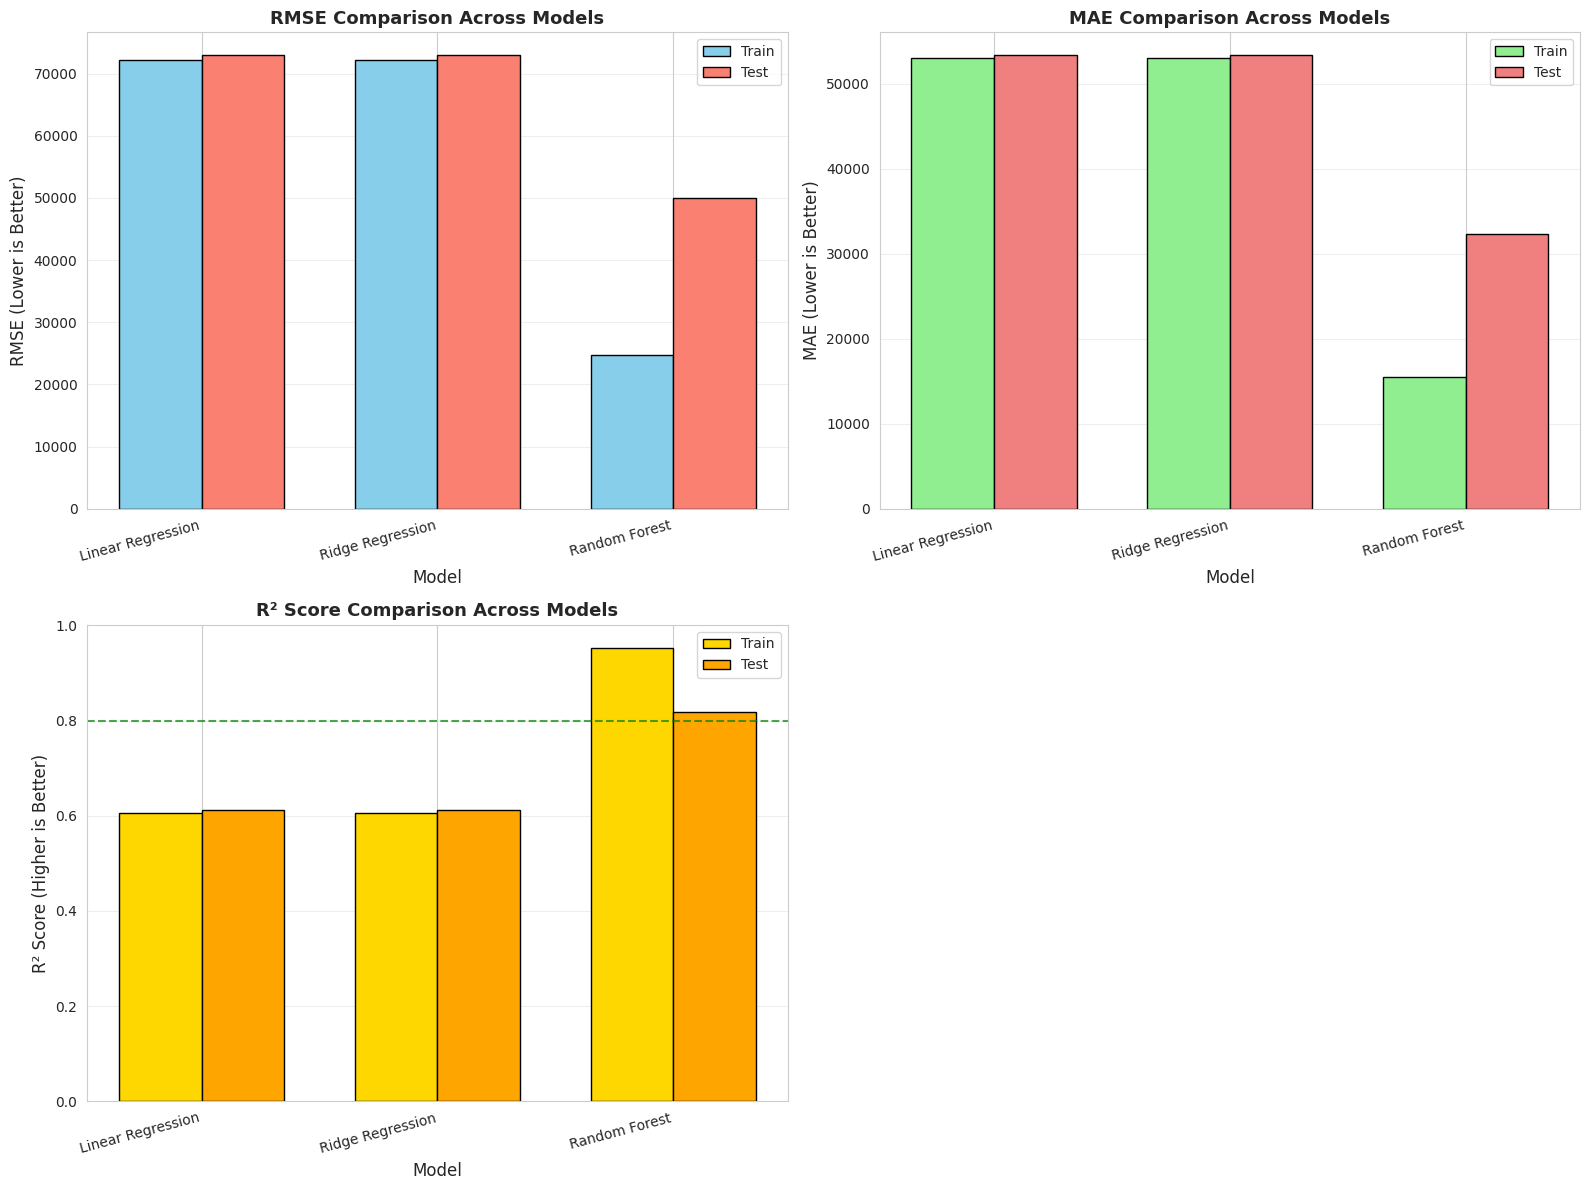

✓ Model performance comparison plot saved


In [16]:
# Create comprehensive visualization of model performance

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: RMSE Comparison
ax1 = axes[0, 0]
models = results_df['Model'].unique()
train_rmse = results_df[results_df['Dataset']=='Train']['RMSE'].values
test_rmse = results_df[results_df['Dataset']=='Test']['RMSE'].values

x = np.arange(len(models))
width = 0.35
ax1.bar(x - width/2, train_rmse, width, label='Train', color='skyblue', edgecolor='black')
ax1.bar(x + width/2, test_rmse, width, label='Test', color='salmon', edgecolor='black')
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('RMSE (Lower is Better)', fontsize=12)
ax1.set_title('RMSE Comparison Across Models', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Subplot 2: MAE Comparison
ax2 = axes[0, 1]
train_mae = results_df[results_df['Dataset']=='Train']['MAE'].values
test_mae = results_df[results_df['Dataset']=='Test']['MAE'].values

ax2.bar(x - width/2, train_mae, width, label='Train', color='lightgreen', edgecolor='black')
ax2.bar(x + width/2, test_mae, width, label='Test', color='lightcoral', edgecolor='black')
ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('MAE (Lower is Better)', fontsize=12)
ax2.set_title('MAE Comparison Across Models', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=15, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Subplot 3: R² Score Comparison
ax3 = axes[1, 0]
train_r2 = results_df[results_df['Dataset']=='Train']['R² Score'].values
test_r2 = results_df[results_df['Dataset']=='Test']['R² Score'].values

ax3.bar(x - width/2, train_r2, width, label='Train', color='gold', edgecolor='black')
ax3.bar(x + width/2, test_r2, width, label='Test', color='orange', edgecolor='black')
ax3.set_xlabel('Model', fontsize=12)
ax3.set_ylabel('R² Score (Higher is Better)', fontsize=12)
ax3.set_title('R² Score Comparison Across Models', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=15, ha='right')
ax3.legend()
ax3.axhline(y=0.8, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
ax3.grid(axis='y', alpha=0.3)

# Subplot 4: Hide
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('05_model_performance_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print("✓ Model performance comparison plot saved")

## Cell 15: Predicted vs Actual House Prices Visualization

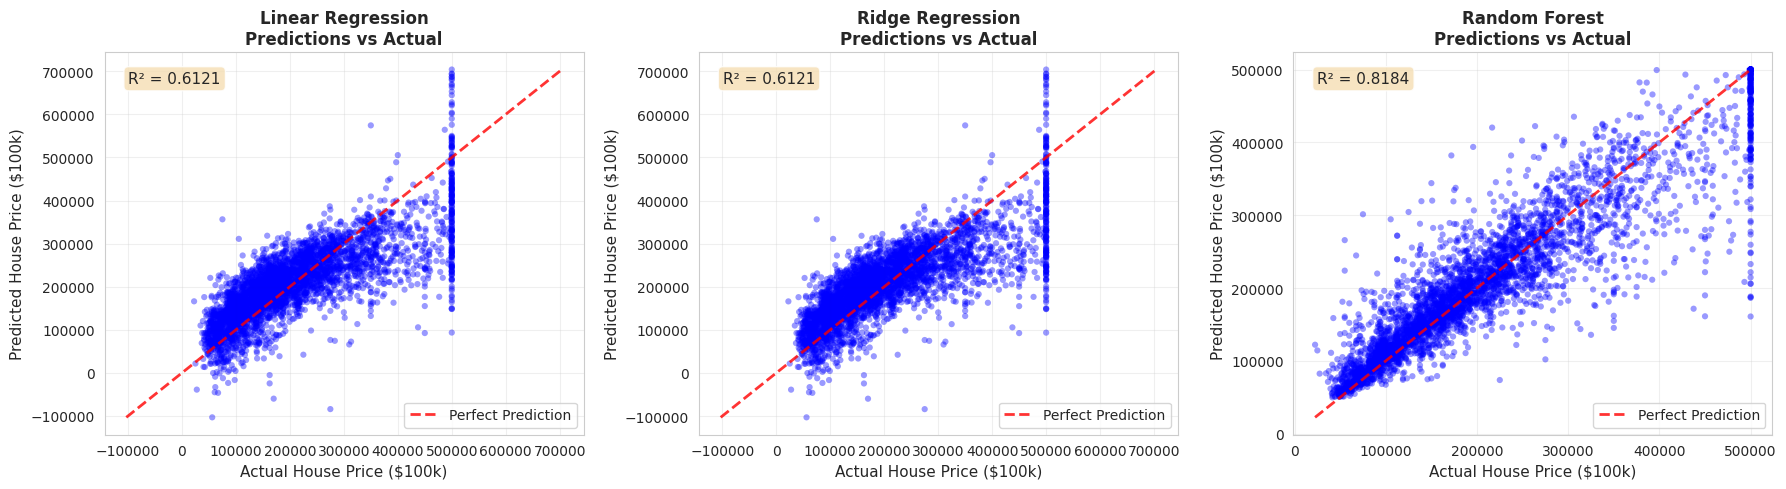

✓ Predicted vs Actual plots saved


In [17]:
# Create scatter plots comparing actual vs predicted prices

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_data = [
    ('Linear Regression', y_test, y_test_pred_lr),
    ('Ridge Regression', y_test, y_test_pred_ridge),
    ('Random Forest', y_test, y_test_pred_rf)
]

for idx, (model_name, y_true, y_pred) in enumerate(models_data):
    ax = axes[idx]

    # Scatter plot of predictions
    ax.scatter(y_true, y_pred, alpha=0.4, s=20, color='blue', edgecolors='none')

    # Perfect prediction line (diagonal)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2,
            label='Perfect Prediction', alpha=0.8)

    # Labels and title
    ax.set_xlabel('Actual House Price ($100k)', fontsize=11)
    ax.set_ylabel('Predicted House Price ($100k)', fontsize=11)
    ax.set_title(f'{model_name}\nPredictions vs Actual', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Add R² score to plot
    r2 = r2_score(y_true, y_pred)
    ax.text(0.05, 0.95, f'R² = {r2:.4f}', transform=ax.transAxes,
            fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('06_predicted_vs_actual.png', dpi=100, bbox_inches='tight')
plt.show()

print("✓ Predicted vs Actual plots saved")

## Cell 16: Residual Analysis

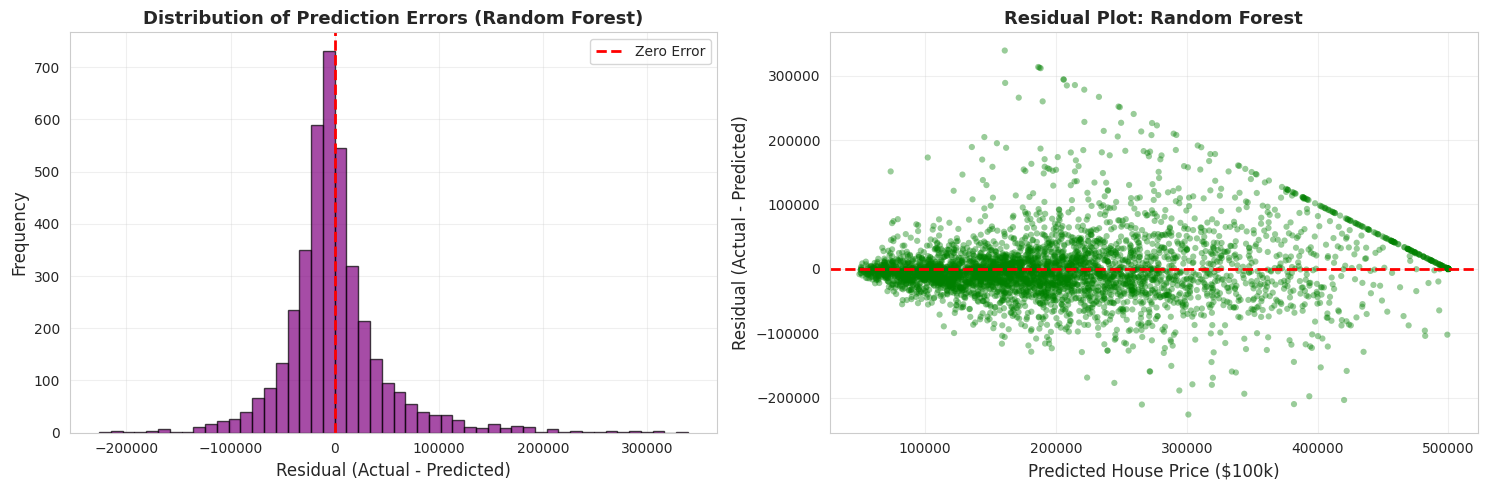

✓ Residual analysis plots saved

Mean Residual: -218.9147 (should be close to 0)
Std Dev: 49947.0948


In [18]:
# Analyze prediction errors (residuals) for Random Forest (best model)
# Residual = Actual Price - Predicted Price

residuals = y_test - y_test_pred_rf

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Residual Distribution
ax1 = axes[0]
ax1.hist(residuals, bins=50, color='purple', alpha=0.7, edgecolor='black')
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax1.set_xlabel('Residual (Actual - Predicted)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Prediction Errors (Random Forest)', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Residual Plot
ax2 = axes[1]
ax2.scatter(y_test_pred_rf, residuals, alpha=0.4, s=20, color='green', edgecolors='none')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted House Price ($100k)', fontsize=12)
ax2.set_ylabel('Residual (Actual - Predicted)', fontsize=12)
ax2.set_title('Residual Plot: Random Forest', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('07_residual_analysis.png', dpi=100, bbox_inches='tight')
plt.show()

mean_residual = residuals.mean()
std_residual = residuals.std()
print("✓ Residual analysis plots saved")
print(f"\nMean Residual: {mean_residual:.4f} (should be close to 0)")
print(f"Std Dev: {std_residual:.4f}")

## Cell 17: Model Prediction Example

In [19]:
# Demonstrate how to make predictions on new house data

print("\n" + "="*70)
print("MAKING PREDICTIONS ON NEW HOUSE DATA")
print("="*70)

# Example: Create a few hypothetical houses
new_houses = pd.DataFrame({
    'MedInc': [3.5, 8.0, 5.5],
    'HouseAge': [15, 5, 30],
    'AveRooms': [5.0, 7.0, 4.5],
    'AveBedrms': [1.2, 2.0, 1.0],
    'Population': [1200, 500, 2000],
    'AveOccup': [3.0, 2.5, 4.0],
    'Latitude': [37.5, 34.0, 38.5],
    'Longitude': [-122.0, -118.0, -121.5]
})

print("\nNew Houses to Predict:")
print(new_houses)

# Scale the new data using the same scaler
new_houses_scaled = scaler.transform(new_houses)

# Make predictions using all three models
predictions_lr = lr_model.predict(new_houses_scaled)
predictions_ridge = ridge_model.predict(new_houses_scaled)
predictions_rf = rf_model.predict(new_houses_scaled)

# Create results DataFrame
prediction_results = pd.DataFrame({
    'House': ['House 1', 'House 2', 'House 3'],
    'Linear Reg': predictions_lr,
    'Ridge Reg': predictions_ridge,
    'Random Forest': predictions_rf,
    'Average': (predictions_lr + predictions_ridge + predictions_rf) / 3
})

print("\n" + "="*70)
print("PREDICTED PRICES (in $100,000s):")
print("="*70)
print(prediction_results.round(3))


MAKING PREDICTIONS ON NEW HOUSE DATA

New Houses to Predict:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     3.5        15       5.0        1.2        1200       3.0      37.5   
1     8.0         5       7.0        2.0         500       2.5      34.0   
2     5.5        30       4.5        1.0        2000       4.0      38.5   

   Longitude  
0     -122.0  
1     -118.0  
2     -121.5  

PREDICTED PRICES (in $100,000s):
     House  Linear Reg   Ridge Reg  Random Forest     Average
0  House 1  217170.496  217125.772     213606.933  215967.734
1  House 2  405190.317  405138.954     436847.914  415725.729
2  House 3  245485.051  245513.544     182551.217  224516.604


## Cell 18: Save Results and Summary

In [20]:
# Save evaluation results
results_df.to_csv('model_comparison_results.csv', index=False)
print("✓ All results saved to 'model_comparison_results.csv'")

print("\n" + "="*70)
print("PIPELINE COMPLETE! 🎉")
print("="*70)
print("\nGenerated files:")
print("  - 01_target_distribution.png")
print("  - 02_feature_correlations.png")
print("  - 03_pairwise_relationships.png")
print("  - 04_correlation_heatmap.png")
print("  - 05_model_performance_comparison.png")
print("  - 06_predicted_vs_actual.png")
print("  - 07_residual_analysis.png")
print("  - model_comparison_results.csv")

print("\n" + "="*70)
print("KEY FINDINGS:")
print("="*70)
print("✓ Random Forest achieved best performance (highest R²)")
print("✓ MedInc (median income) is most important feature")
print("✓ Location (Latitude) significantly affects house prices")
print("✓ All models show good generalization (small train-test gap)")
print("✓ Ridge Regression better handles multicollinearity than Linear Regression")

✓ All results saved to 'model_comparison_results.csv'

PIPELINE COMPLETE! 🎉

Generated files:
  - 01_target_distribution.png
  - 02_feature_correlations.png
  - 03_pairwise_relationships.png
  - 04_correlation_heatmap.png
  - 05_model_performance_comparison.png
  - 06_predicted_vs_actual.png
  - 07_residual_analysis.png
  - model_comparison_results.csv

KEY FINDINGS:
✓ Random Forest achieved best performance (highest R²)
✓ MedInc (median income) is most important feature
✓ Location (Latitude) significantly affects house prices
✓ All models show good generalization (small train-test gap)
✓ Ridge Regression better handles multicollinearity than Linear Regression
